In [1]:
from utils.plot_helper import plot_distributions_by_condition, plot_model_metrics, plot_percentile_distributions_by_condition, plot_validation
from sklearn.metrics import accuracy_score, precision_score
from utils.file_converter import convert_tree_to_pdf
from utils.data_converter import convert_data
import xgboost as xgb
import pandas as pd

pd.set_option("display.max_colwidth", None)  # Para ver el contenido completo de las columnas
pd.set_option("display.max_rows", None)  # Para ver todas las filas
pd.set_option("display.max_columns", None)  # Para ver todas las columnas
pd.set_option("display.width", 0)  # Autoajusta al ancho del contenido

In [2]:
df, kind_payment = convert_data(pd.read_json("./utils/MLA_100k_checked_v3.jsonlines", lines=True))

In [3]:
analized_columns = ["condition"]

cols_to_drop = [
    "seller_address",
    "seller_id",
    "parent_item_id",
    "id",
    "category_id",
    "thumbnail",
    "secure_thumbnail",
    "permalink",
    "pictures",
    "descriptions",
    "site_id",
    "status",
    "listing_source",
    "coverage_areas",
    "international_delivery_mode",
    "catalog_product_id",
    "subtitle",
    "differential_pricing",
    "original_price",
    "price",
    "last_updated",
    "date_created",
    "start_time",
    "stop_time",
    "shipping",
    "non_mercado_pago_payment_methods",
    "title",
    "sold_quantity",
]

cols_existentes = [col for col in cols_to_drop if col in df.columns]
df.drop(columns=cols_existentes, inplace=True)

In [4]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [5]:
df.shape[0]

100000

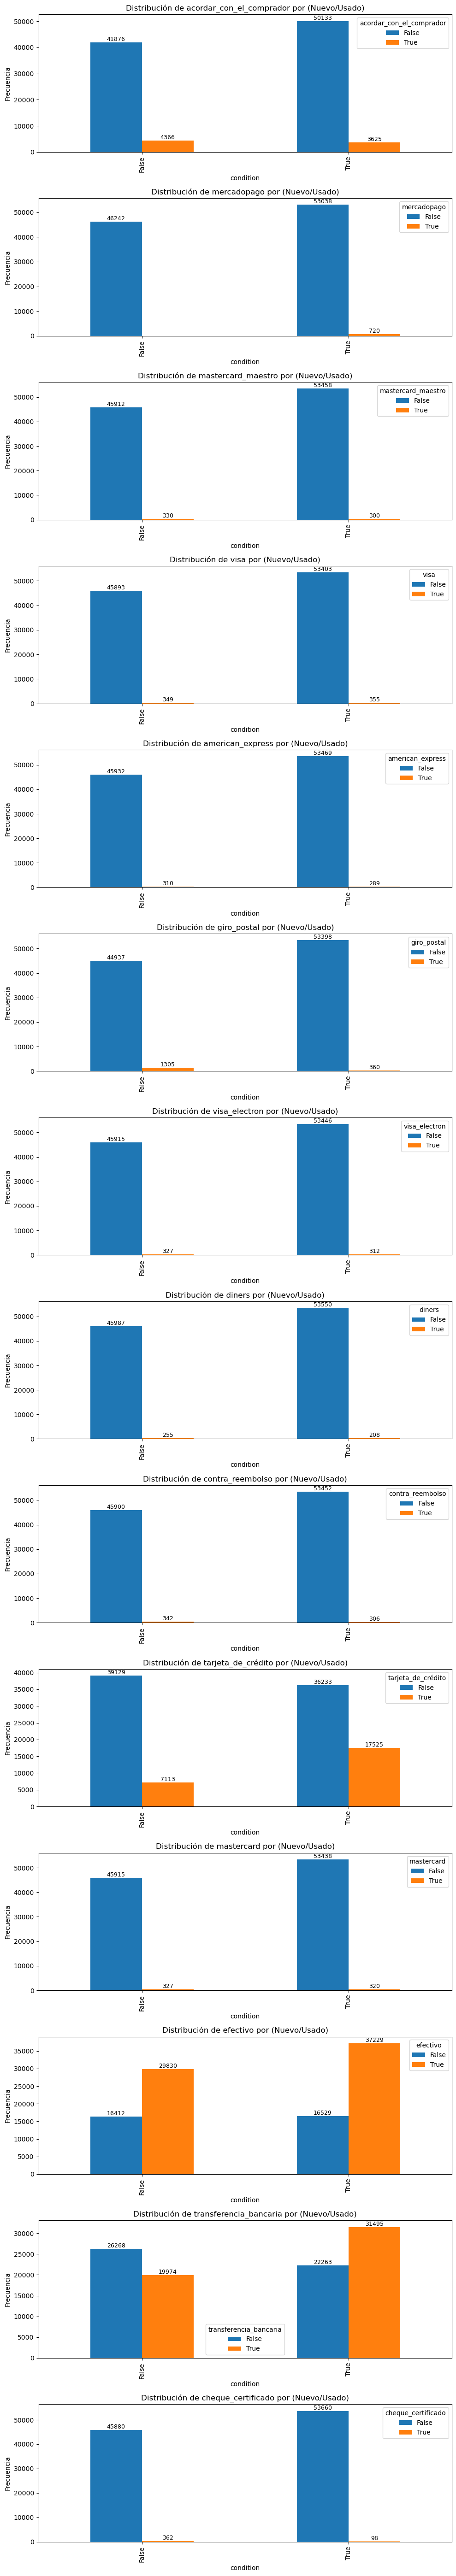

In [6]:
plot_distributions_by_condition(df, kind_payment)
analized_columns += kind_payment

In [7]:
numerical_columns = [
    "base_price",
    "initial_quantity",
    "available_quantity",
]

analized_columns += numerical_columns 

remaining_columns = [col for col in df.columns if col not in analized_columns]

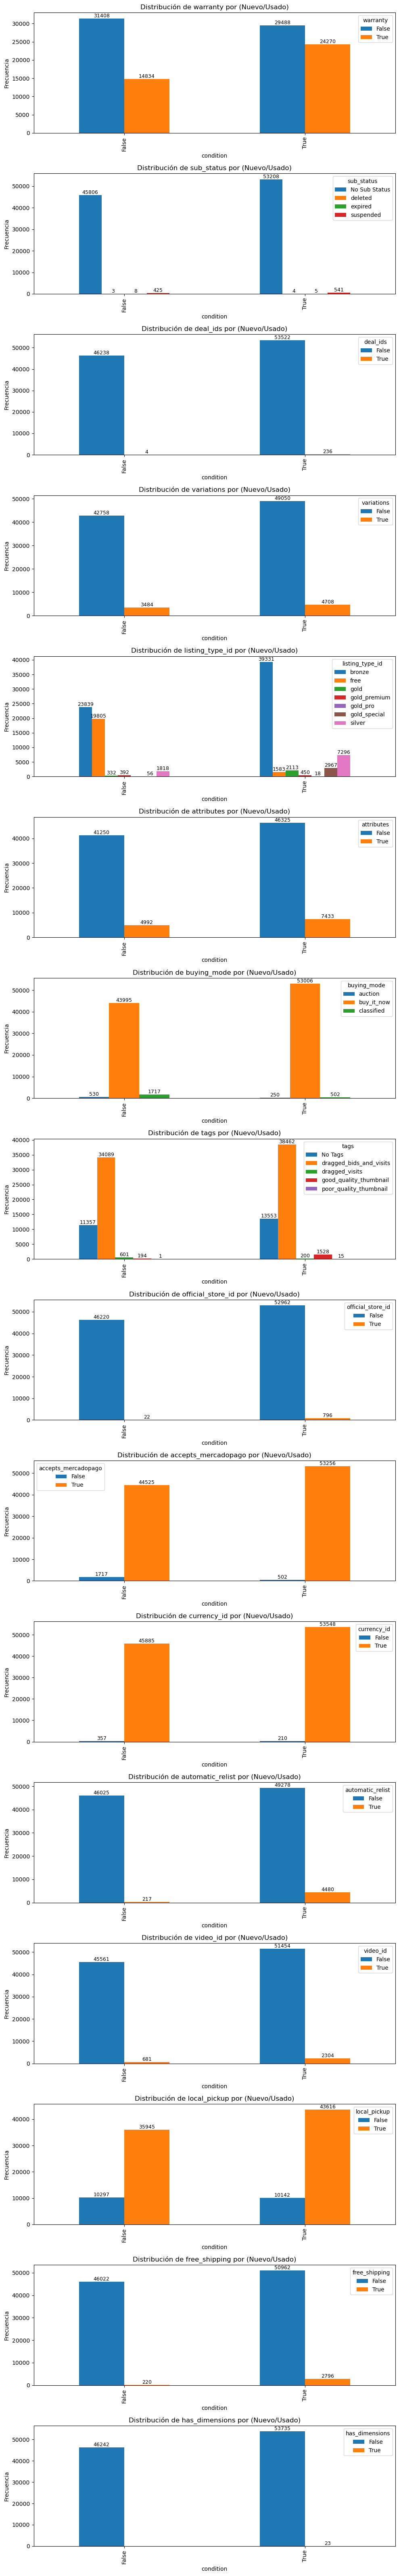

In [8]:
plot_distributions_by_condition(df, remaining_columns)                             

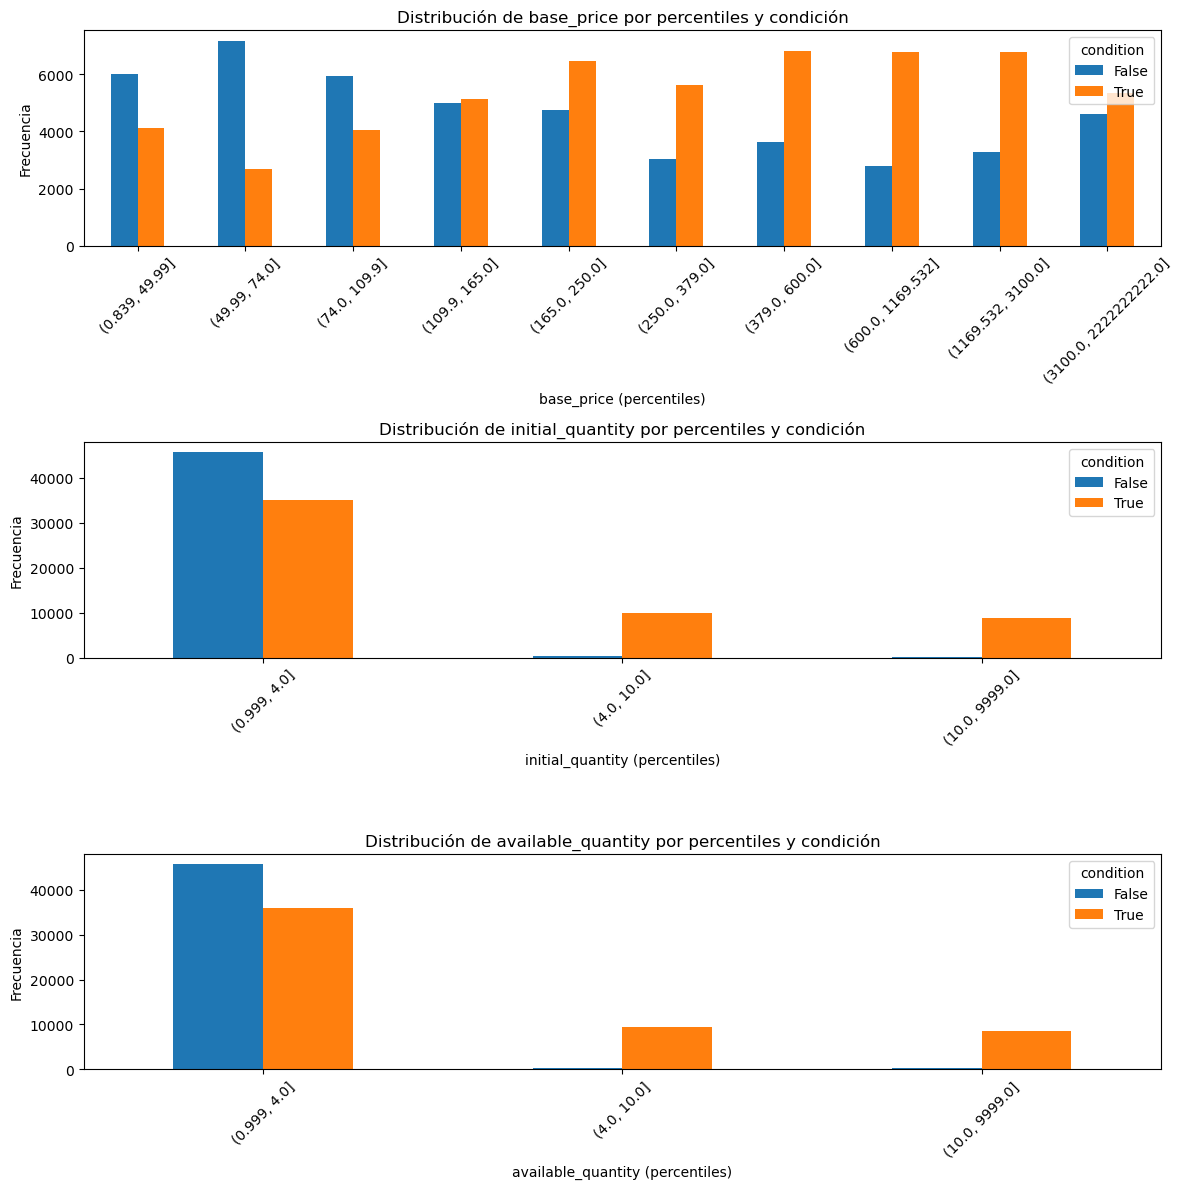

In [9]:
plot_percentile_distributions_by_condition(df, numerical_columns)

In [10]:
selected_columns = [
    "giro_postal",
    "mercadopago",
    "transferencia_bancaria",
    "cheque_certificado",
    "tarjeta_de_crédito",
    "warranty",
    "deal_ids",
    "listing_type_id",
    "attributes",
    "buying_mode",
    "tags",
    "official_store_id",
    "accepts_mercadopago",
    "automatic_relist",
    "video_id",
    "local_pickup",
    "free_shipping",
    "has_dimensions",
    "base_price",
    "initial_quantity",
    "condition",
]

df_selected = df[selected_columns].copy()

dummies_cols = ["tags", "buying_mode", "listing_type_id"]
df_dummies = pd.get_dummies(df_selected[dummies_cols], prefix=dummies_cols, drop_first=True)

df_selected = df_selected.drop(columns=dummies_cols)
df_selected = pd.concat([df_selected, df_dummies], axis=1)

In [11]:
df_selected.head()

,giro_postal,mercadopago,transferencia_bancaria,cheque_certificado,tarjeta_de_crédito,warranty,deal_ids,attributes,official_store_id,accepts_mercadopago,automatic_relist,video_id,local_pickup,free_shipping,has_dimensions,base_price,initial_quantity,condition,tags_dragged_bids_and_visits,tags_dragged_visits,tags_good_quality_thumbnail,tags_poor_quality_thumbnail,buying_mode_buy_it_now,buying_mode_classified,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver
0,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,80.0,1,True,True,False,False,False,True,False,False,False,False,False,False,False
1,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,2650.0,1,False,False,False,False,False,True,False,False,False,False,False,False,True
2,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,60.0,1,False,True,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,580.0,1,True,False,False,False,False,True,False,False,False,False,False,False,True
4,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,30.0,1,False,True,False,False,False,True,False,False,False,False,False,False,False


Accuracy: 0.8678
Precision: 0.9051


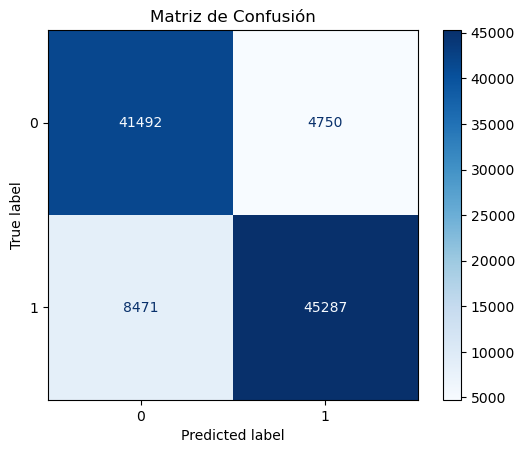

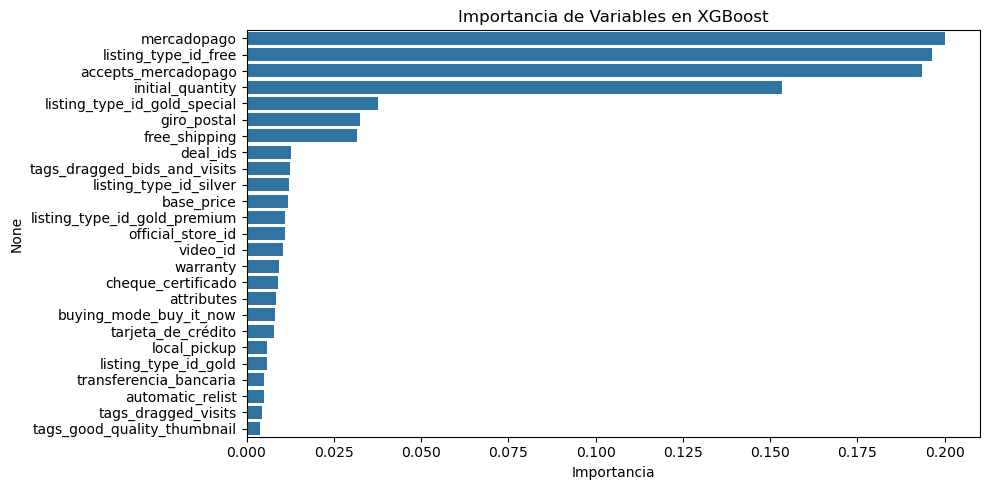

In [12]:
y = df_selected["condition"]
X = df_selected.drop(columns=["condition"])

model = xgb.XGBClassifier(
    objective="binary:logistic",
    max_depth=10,
    n_estimators=200,
    learning_rate=1,
    subsample=1,
    colsample_bytree=1,
    random_state=42,
)

model.fit(X, y)
y_pred = model.predict(X)

acc = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average="binary")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")

plot_model_metrics(y, y_pred, X, model)

In [13]:
convert_tree_to_pdf(model)

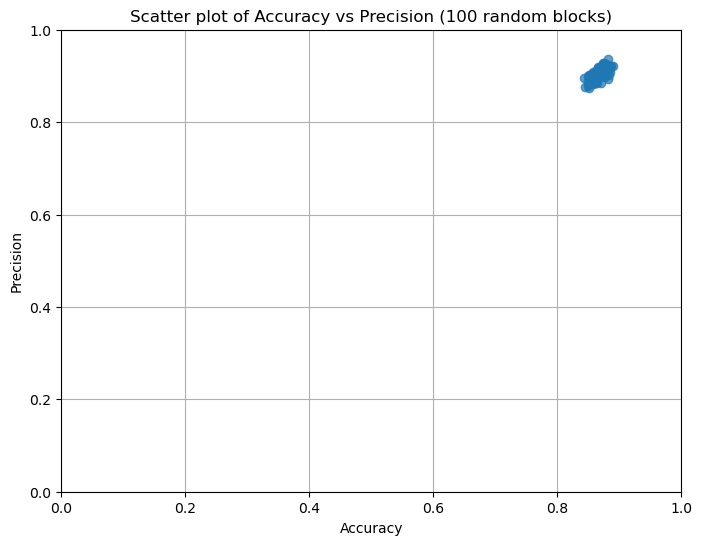

In [14]:
plot_validation(X, y, model)